# Training & Evaluation
* We are going to break down training and evaluation into multiple notebooks, one for each algorithm that we train and evalutate. 
* In this first notebook, we'll create baseline models to get the predictions based on `stratified` and `most frequent` classes.
* We'll also explore the preprocessed features to understand correlation and the shape of the data. 

## Install Libraries

In [12]:
%pip install scikit-learn
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Import Libraries

In [13]:
import os
import sys
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from pathlib import Path
import matplotlib.pyplot as plt

# Build an absolute path from this notebook's parent directory
module_path = os.path.abspath(os.path.join('..'))

# Add to sys.path if not already present
if module_path not in sys.path:
    sys.path.append(module_path)
    
from src.utils import preprocessing

## Initialize Directories

In [4]:
data_root_dir = Path("..", "data/")
models_root_dir = Path("..", "models/")

## Read Data

In [5]:
X_train = pd.read_csv(Path(data_root_dir,"X_train.csv"))
y_train = pd.read_csv(Path(data_root_dir,"y_train.csv"))
X_test = pd.read_csv(Path(data_root_dir,"X_test.csv"))
y_test = pd.read_csv(Path(data_root_dir,"y_test.csv"))


## BaseLine Models

### Stratified Classifier

In [11]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score,recall_score,precision_score,precision_recall_curve
import seaborn as sns

dummy_stratified = DummyClassifier(strategy="stratified", random_state=42)
dummy_stratified.fit(X_train,y_train)

## predict and evaulate
stratified_predictions = dummy_stratified.predict(X_test)
stratified_recall = recall_score(y_test, stratified_predictions)
stratified_precision = precision_score(y_test, stratified_predictions)
stratified_f1 = f1_score(y_test, stratified_predictions)
precision,recall, thresholds = precision_recall_curve(y_test,stratified_predictions)
print(f"Stratified Prediction - Recall: {stratified_recall:.4f}")
print(f"Stratified Prediction - Precision: {stratified_precision:.4f}")
print(f"Weighted F1: {stratified_f1:.4f}")

Stratified Prediction - Recall: 0.5936
Stratified Prediction - Precision: 0.5918
Weighted F1: 0.5927


#### Precision Recall Curve

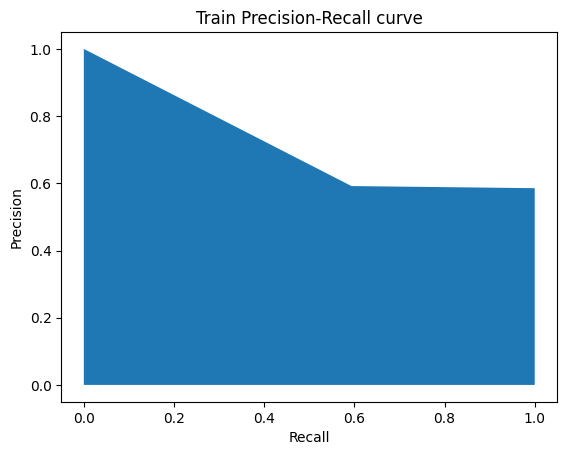

In [7]:
plt.fill_between(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Train Precision-Recall curve");

Observations:
* Our `0.59` recall score tells us that out of all positive cases our model was able to identify 59% of cases,i.e it misdiagnoized 41% cases where the students were actually depressed.
* `0.59` Precision score tells us that out of all the postive predictions only 59% were actually positive and 41% were false positive, i.e. 41% of the students will need unnecessary worry, follow-up and resource allocation. 

### Most Frequent Classifier

In [8]:

dummy_most_frequent = DummyClassifier(strategy="most_frequent", random_state=42)
dummy_most_frequent.fit(X_train,y_train)

## predict and evaulate
most_frequent_predictions = dummy_most_frequent.predict(X_test)
most_frequent_recall = recall_score(y_test, most_frequent_predictions)
most_frequent_precision = precision_score(y_test, most_frequent_predictions)
most_frequent_f1 = f1_score(y_test, most_frequent_predictions)
precision,recall, thresholds = precision_recall_curve(y_test,stratified_predictions)
print(f"Most Frequent Prediction - Recall: {most_frequent_recall:.4f}")
print(f"Most Frequent Prediction - Precision: {most_frequent_precision:.4f}")
print(f"Weighted F1: {most_frequent_f1:.4f}")

Most Frequent Prediction - Recall: 1.0000
Most Frequent Prediction - Precision: 0.5856
Weighted F1: 0.7386


#### Precision Recall Curve

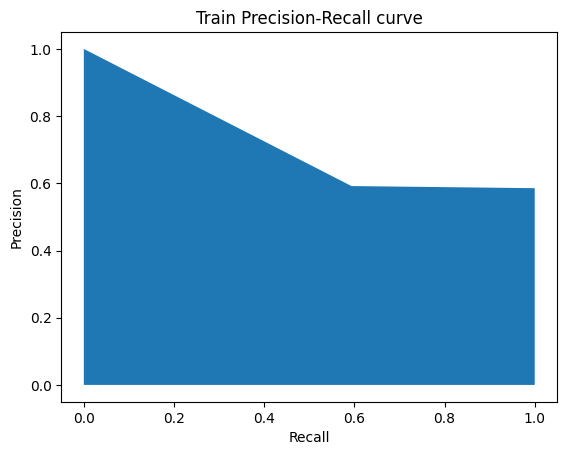

In [9]:
plt.fill_between(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Train Precision-Recall curve");

Observations:
* Our `1` recall score tells us that out of all positive cases our model was able to identify 100% of cases,which is great because our model didn't misdiagnoize any actually depressed students.
* `0.58` Precision score tells us that out of all the postive predictions only 58% were actually positive and 42% were false positive, i.e. 42% of the students will need unnecessary worry, follow-up and resource allocation. 
* Even though recall score of 1 is desirable, we want to aim for better F1 score, i.e better balance between recall and precision. 

## Understanding Data Correlation

In [10]:
preprocessed_data_df = pd.DataFrame(preprocessing.pipeline.fit_transform(
    X_train,y_train), columns=preprocessing.pipeline.get_feature_names_out())
preprocessed_data_df.head()

,preprocess_gender__gender_female,preprocess_gender__gender_male,preprocess_profession__profession_student,preprocess_profession__profession_working,sleep_duration_pipeline__sleep_duration_bt_5_6,sleep_duration_pipeline__sleep_duration_bt_7_8,sleep_duration_pipeline__sleep_duration_gt_8,sleep_duration_pipeline__sleep_duration_lt_5,dietary_habits_pipeline__dietary_habits_healthy,dietary_habits_pipeline__dietary_habits_moderate,...,age_pipeline__encode_age_range__age_range_gte_33,cgpa_pipeline__encode_cgpa_range__cgpa_range_4_to_7,cgpa_pipeline__encode_cgpa_range__cgpa_range_gte_7,cgpa_pipeline__encode_cgpa_range__cgpa_range_lt_4,hours_pipeline__encode_hours_range__hours_range_4_to_8,hours_pipeline__encode_hours_range__hours_range_gte_8,hours_pipeline__encode_hours_range__hours_range_lt_4,ratings_column_pipeline__academic_pressure,ratings_column_pipeline__study_satisfaction,ratings_column_pipeline__financial_stress
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0,5.0
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,2.0,1.0
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,2.0,5.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,5.0,3.0
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,4.0,5.0


### Feature Correlations

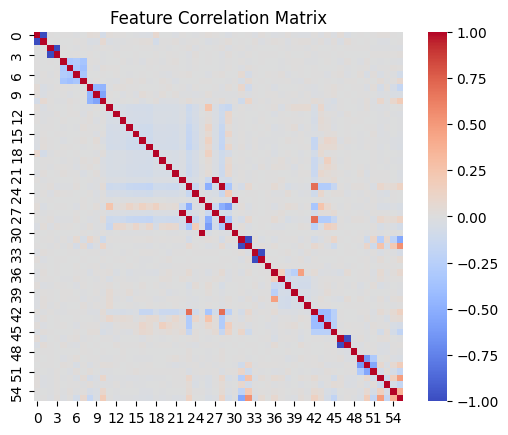

In [26]:
combined_matrix = pd.concat([preprocessed_data_df,y_train], axis=1)
combined_matrix.head()
correlation_matrix = np.corrcoef(combined_matrix.T)

sns.heatmap(correlation_matrix, cmap='coolwarm', square=True)

plt.title("Feature Correlation Matrix")

plt.show()

Observations:
* Its hard to interpret the exact correlation between features, but the heatmap tells us that majority of the features are not correlated, which means linear separation might be easier. We'll still need to confirm it by training and comparison. 

In [35]:
correlation = combined_matrix.corr()
correlation.head()

,preprocess_gender__gender_female,preprocess_gender__gender_male,preprocess_profession__profession_student,preprocess_profession__profession_working,sleep_duration_pipeline__sleep_duration_bt_5_6,sleep_duration_pipeline__sleep_duration_bt_7_8,sleep_duration_pipeline__sleep_duration_gt_8,sleep_duration_pipeline__sleep_duration_lt_5,dietary_habits_pipeline__dietary_habits_healthy,dietary_habits_pipeline__dietary_habits_moderate,...,cgpa_pipeline__encode_cgpa_range__cgpa_range_4_to_7,cgpa_pipeline__encode_cgpa_range__cgpa_range_gte_7,cgpa_pipeline__encode_cgpa_range__cgpa_range_lt_4,hours_pipeline__encode_hours_range__hours_range_4_to_8,hours_pipeline__encode_hours_range__hours_range_gte_8,hours_pipeline__encode_hours_range__hours_range_lt_4,ratings_column_pipeline__academic_pressure,ratings_column_pipeline__study_satisfaction,ratings_column_pipeline__financial_stress,depression
preprocess_gender__gender_female,1.000000,-1.000000,0.001355,-0.001355,0.006605,0.007662,-0.010963,-0.003503,0.038017,0.029968,...,0.038238,-0.038211,-0.000507,0.001542,-0.006760,0.006613,0.022927,0.018625,0.005185,-0.000062
preprocess_gender__gender_male,-1.000000,1.000000,-0.001355,0.001355,-0.006605,-0.007662,0.010963,0.003503,-0.038017,-0.029968,...,-0.038238,0.038211,0.000507,-0.001542,0.006760,-0.006613,-0.022927,-0.018625,-0.005185,0.000062
preprocess_profession__profession_student,0.001355,-0.001355,1.000000,-1.000000,0.005626,-0.000480,-0.010716,0.005003,-0.014221,0.003297,...,-0.002751,0.002728,0.000605,0.001947,0.004890,-0.008056,-0.012620,-0.008223,-0.011421,-0.023402
preprocess_profession__profession_working,-0.001355,0.001355,-1.000000,1.000000,-0.005626,0.000480,0.010716,-0.005003,0.014221,-0.003297,...,0.002751,-0.002728,-0.000605,-0.001947,-0.004890,0.008056,0.012620,0.008223,0.011421,0.023402
sleep_duration_pipeline__sleep_duration_bt_5_6,0.006605,-0.006605,0.005626,-0.005626,1.000000,-0.319463,-0.281376,-0.348197,0.011269,0.005144,...,-0.019157,0.019279,-0.003386,-0.021678,0.020267,-0.001604,-0.010165,-0.000338,-0.015578,-0.018974


#### Plotting Correlations

In [40]:
sorted_correlations = correlation["depression"].sort_values(ascending=False)
sorted_correlations

np.float64(1.0)

/tmp/ipykernel_215400/1667283569.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_correlations.values, y=sorted_correlations.index, palette="vlag") # 'vlag' is good for diverging values


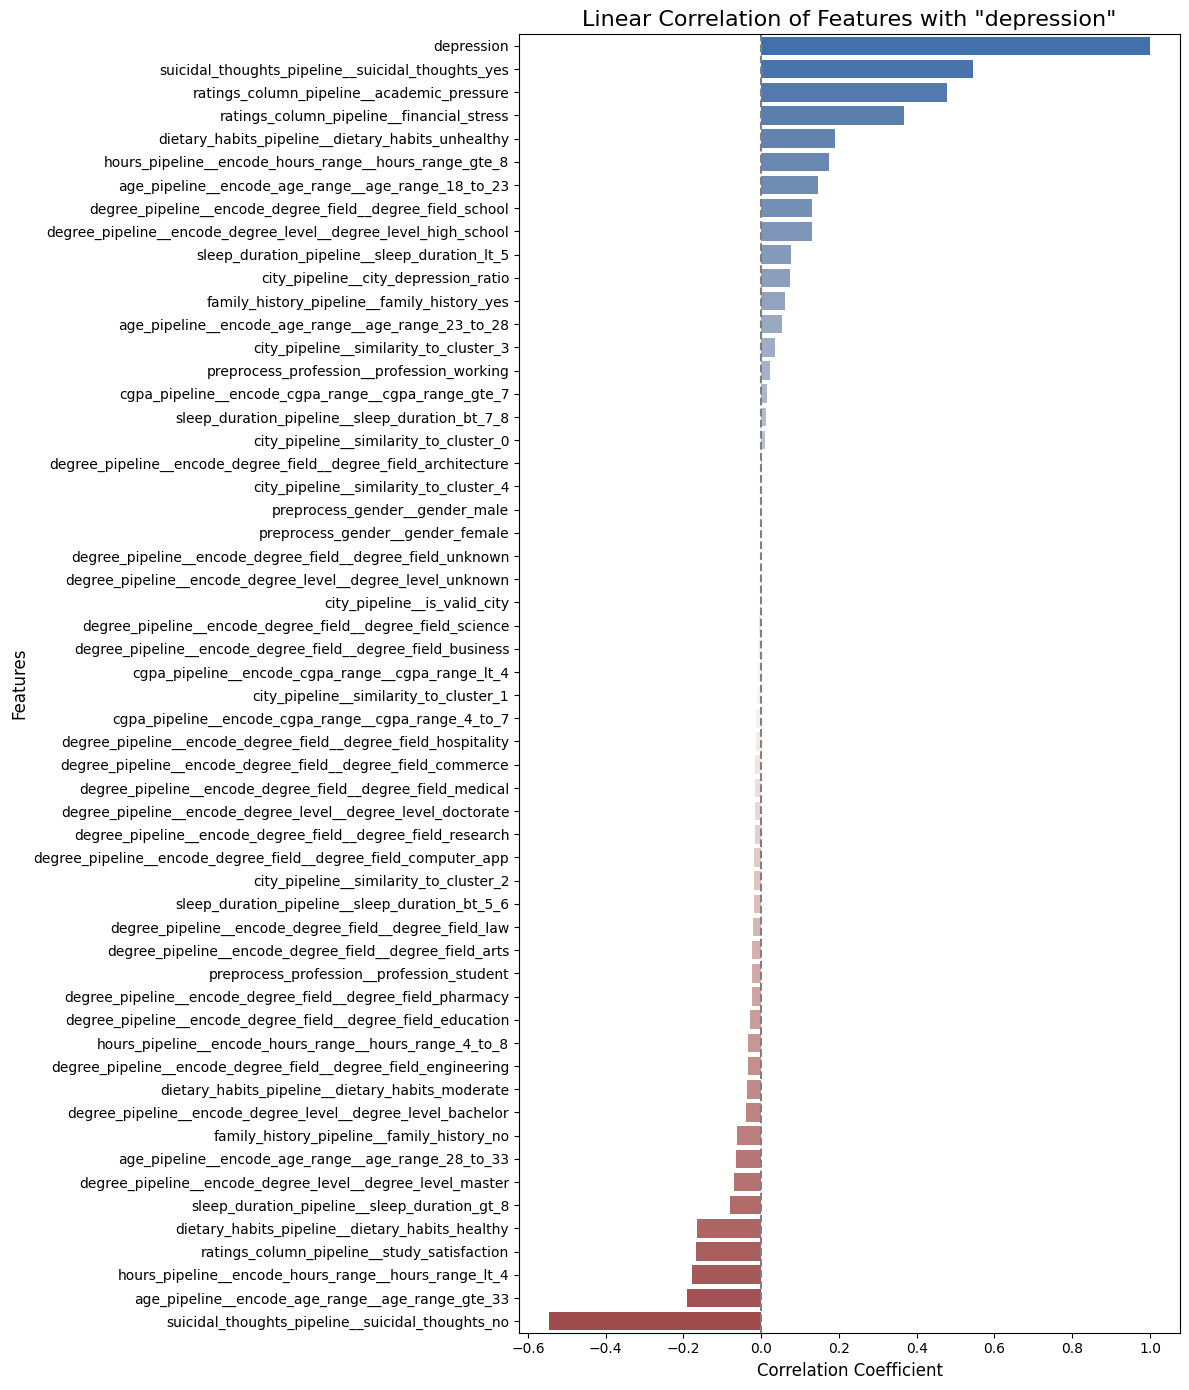


Top 5 most positively correlated features:
depression                                           1.000000
suicidal_thoughts_pipeline__suicidal_thoughts_yes    0.545436
ratings_column_pipeline__academic_pressure           0.477697
ratings_column_pipeline__financial_stress            0.368396
dietary_habits_pipeline__dietary_habits_unhealthy    0.189296
Name: depression, dtype: float64

Top 5 most negatively correlated features:
dietary_habits_pipeline__dietary_habits_healthy        -0.165526
ratings_column_pipeline__study_satisfaction            -0.166507
hours_pipeline__encode_hours_range__hours_range_lt_4   -0.178936
age_pipeline__encode_age_range__age_range_gte_33       -0.190476
suicidal_thoughts_pipeline__suicidal_thoughts_no       -0.545436
Name: depression, dtype: float64


In [39]:
# 3. Create the bar plot
plt.figure(figsize=(12, 14)) # Adjust figsize as needed for 55 features; you might need a taller figure
sns.barplot(x=sorted_correlations.values, y=sorted_correlations.index, palette="vlag") # 'vlag' is good for diverging values
plt.title(f'Linear Correlation of Features with "depression"', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.axvline(x=0, color='grey', linestyle='--') # Add a line at 0 for reference
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

print("\nTop 5 most positively correlated features:")
print(sorted_correlations.head(5))
print("\nTop 5 most negatively correlated features:")
print(sorted_correlations.tail(5))

Observations:
* Features such as suicidal_thoughts, academic_pressure, financial_stress, and unhealthy_dietary_habits exhibit a positive correlation with reported depression, indicating that higher values or presence of these factors are associated with an increased likelihood of depression.
* Conversely, healthy_dietary_habits and study_satisfaction demonstrate a negative correlation with depression. This suggests that the presence of these factors is associated with a reduced likelihood of depression. The suicidal_thoughts feature, when viewed from its opposite end (i.e., lower scores indicating fewer or no suicidal thoughts), also aligns with this negative correlation pattern with depression